GIF saved as accuracy_evolution.gif


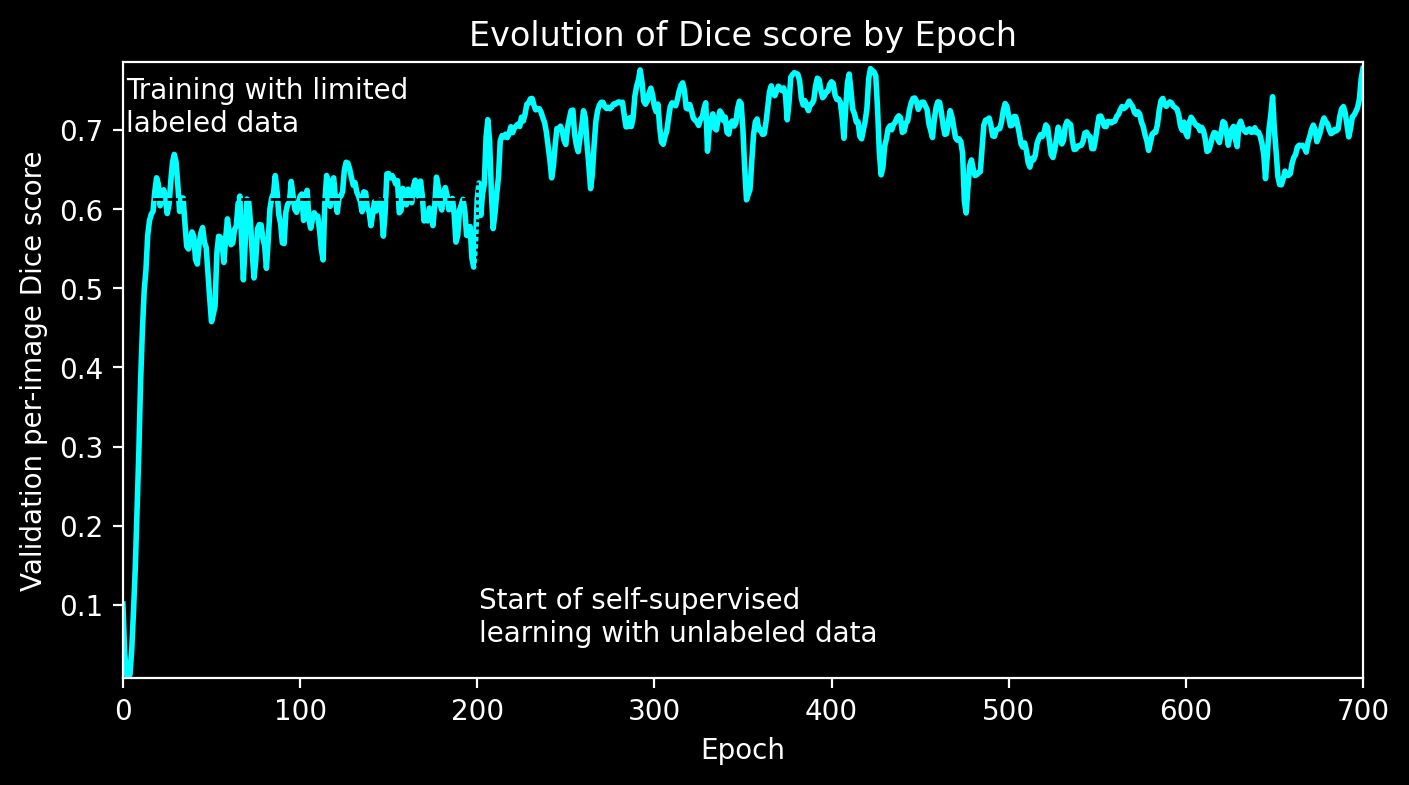

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200


# 1. Load your data
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/wandb.csv')
df['epoch'] = df['epoch'].astype(int)
df['accuracy'] = df['apricot-butterfly-13 - valid_dataset_f1'].astype(float)

# 2. Find the switch point at epoch 200
epoch_switch = 200
idx_switch = df.index[df['epoch'] == epoch_switch][0]
plateau_val = df['accuracy'].iloc[idx_switch]

# 3. Prepare the figure
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)

ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(df['accuracy'].min() * 0.99, df['accuracy'].max() * 1.01)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation per-image Dice score')
ax.set_title('Evolution of Dice score by Epoch')

# 4. Static annotations
# 4.1 Horizontal “plateau” line up to epoch 100
ax.hlines(
    y=plateau_val,
    xmin=df['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',           # singular
    linewidth=1,
    colors='black'
)
ax.text(
    x=df['epoch'].min() + 2,
    y=plateau_val + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Training with limited\nlabeled data',
    va='bottom'
)

# 4.2 Vertical line marking the switch
ax.axvline(
    x=epoch_switch,
    linestyle=':',            # singular
    linewidth=1,
    color='black'
)
ax.text(
    x=epoch_switch + 1,
    y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Start of self-supervised\nlearning with unlabeled data',
    #rotation=90,
    va='bottom'
)

# 5. Build frames (with a little pause at the switch)
frames = list(range(idx_switch + 1)) + [idx_switch] * 60 + list(range(idx_switch + 1, len(df)))

# 6. Update function for FuncAnimation
def update(i):
    cur = frames[i]
    x = df['epoch'].iloc[:cur + 1]
    y = df['accuracy'].iloc[:cur + 1]
    line.set_data(x, y)
    return (line,)

# 7. Create animation
anim = FuncAnimation(
    fig, update,
    frames=len(frames), 
    blit=True,
    interval=30  # ms between frames
)

# 8. Save to GIF
writer = PillowWriter(fps=30)
#anim.save('accuracy_evolution.gif', writer=writer)

print("GIF saved as accuracy_evolution.gif")
# Plot the complete line (last frame)
x = df['epoch']
y = df['accuracy']

line.set_data(x, y)
# fig.patch.set_facecolor('black')  # Fondo del área total de la figura
# ax.set_facecolor('black')         # Fondo específico del área del gráfico

# Save the final frame
fig.patch.set_facecolor('white')  
ax.set_facecolor('white')         

# Cambiar color de línea y texto a oscuros
line.set_color('navy')  # color oscuro para buena visibilidad

# Ajustar textos y anotaciones:
ax.tick_params(colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.title.set_color('black')

# Ajustar textos adicionales
for text in ax.texts:
    text.set_color('black')

fig.savefig('final_frame_white.png', dpi=200, bbox_inches='tight', facecolor=fig.get_facecolor())


fig.patch.set_facecolor('black')  
ax.set_facecolor('black')         

# Cambiar color de línea y texto a claros
line.set_color('cyan')  # color claro para contraste

# Ajustar textos y anotaciones:
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')

# Ajustar textos adicionales
for text in ax.texts:
    text.set_color('white')

fig.savefig('final_frame_dark.png', dpi=200, bbox_inches='tight', facecolor=fig.get_facecolor())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, np.int64(200), np.int64(200), np.int64(200), np.int64(200), np.int64(200), np.int64(200), np.int64(200),

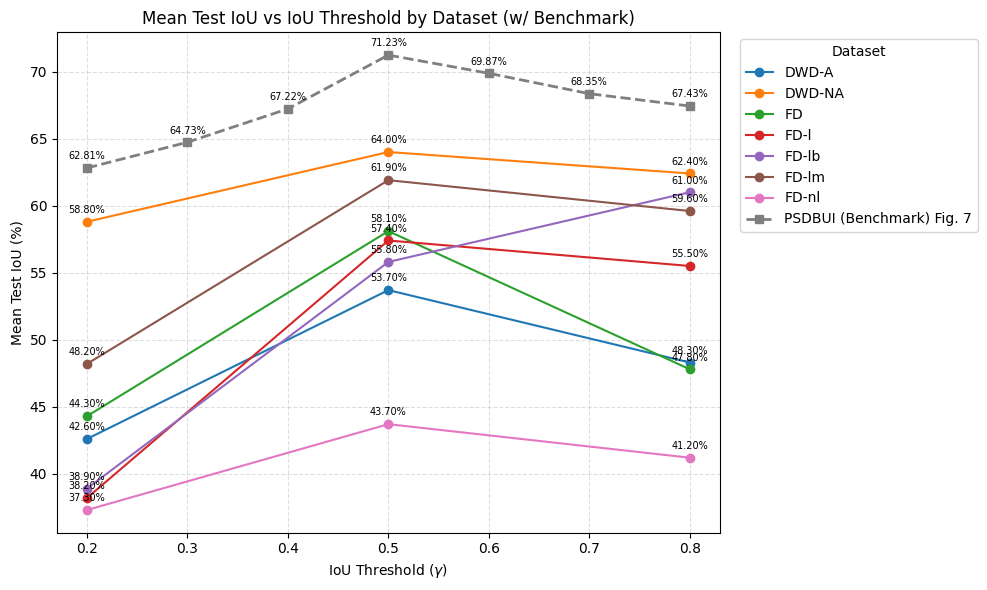

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')
#plt.style.use('dark_background')

# 1) Load your CSV
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/summary_assgan.csv')

# 2) Extract the "mean" part of Test IoU and convert to percent
df['Test IoU (%)'] = (
    df['Test IoU']
      .str.split('±').str[0]   # take everything before "±"
      .astype(float) * 100     # convert to percent
)

# 3) Pivot so that each Group is a column, indexed by the IoU threshold
pivot = df.pivot(index='threshold',
                 columns='Group',
                 values='Test IoU (%)')

# 4) Rename to the acronyms in your Table 1
pivot = pivot.rename(columns={
    'data_uncorrected'             : 'FD',
    'uncorrected_l'                : 'FD-l',
    'uncorrected_nl'               : 'FD-nl',
    'uncorrected_lb'               : 'FD-lb',
    'uncorrected_lm'               : 'FD-lm',
    'data_corrected_w_annotation'  : 'DWD-A',
    'data_corrected_wo_annotation' : 'DWD-NA'
})

# 5) Benchmark series (γ vs IoU%)
bm_gamma = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
bm_iou   = [62.81, 64.73, 67.22, 71.23, 69.87, 68.35, 67.43]

# 6) Plot
plt.figure(figsize=(10, 6))

# 6a) Plot each dataset with a solid line + circle marker
for dataset in pivot.columns:
    plt.plot(pivot.index,
             pivot[dataset],
             marker='o',
             linestyle='-',
             linewidth=1.5,
             label=dataset)

# 6b) Plot the Benchmark with a dashed line + square marker
plt.plot(bm_gamma,
         bm_iou,
         marker='s',
         linestyle='--',
         linewidth=2,
         label='PSDBUI (Benchmark) Fig. 7')

# 7) Annotate every point
for dataset in pivot.columns:
    for x, y in zip(pivot.index, pivot[dataset]):
        plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', va='bottom', fontsize=7)

for x, y in zip(bm_gamma, bm_iou):
    plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', va='bottom', fontsize=7)

# 8) Labels, title, grid, legend
plt.xlabel(r'IoU Threshold ($\gamma$)')
plt.ylabel('Mean Test IoU (%)')
plt.title('Mean Test IoU vs IoU Threshold by Dataset (w/ Benchmark)')
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.legend(title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
#plt.show()

#Save the figure
plt.savefig('mean_test_iou_vs_iou_threshold_w.png', dpi=300, bbox_inches='tight')




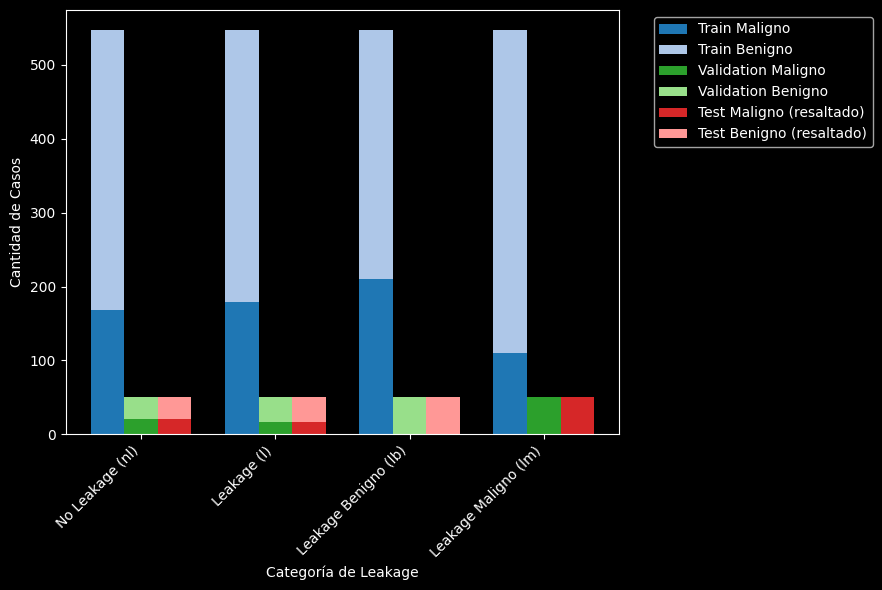

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) Define splits y tipos de leakage
splits = ['train', 'validation', 'test']
leak_types = {
    'No Leakage (nl)': 'nl',
    'Leakage (l)': 'l',
    'Leakage Benigno (lb)': 'lb',
    'Leakage Maligno (lm)': 'lm'
}

# 2) Lee los CSVs y acumula los conteos m/b
counts = {lt: {sp: {'m':0,'b':0} for sp in splits} for lt in leak_types}
for sp in splits:
    for label, suf in leak_types.items():

            df = pd.read_csv(f'/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/{sp}_{suf}.csv')
            counts[label][sp]['m'] = (df['clase']=='malignant').sum()
            counts[label][sp]['b'] = (df['clase']=='benign').sum()

# 3) Prepara ejes y colores
categories = list(leak_types.keys())
x = np.arange(len(categories))
width = 0.25

# Colors por split/clase (aquí test en rojo para resaltar)
colors = {
    'train':      {'m':'#1f77b4',  'b':'#aec7e8'},
    'validation': {'m':'#2ca02c',  'b':'#98df8a'},
    'test':       {'m':'#d62728',  'b':'#ff9896'}
}

plt.figure(figsize=(9,6))

# 4) Dibuja cada split como barras apiladas
for i, sp in enumerate(splits):
    xs = x + (i-1)*width
    m_vals = [counts[cat][sp]['m'] for cat in categories]
    b_vals = [counts[cat][sp]['b'] for cat in categories]
    plt.bar(xs, m_vals, width, color=colors[sp]['m'])
    plt.bar(xs, b_vals, width, bottom=m_vals, color=colors[sp]['b'])

# 5) Etiquetas y leyenda
plt.xticks(x, categories, rotation=45, ha='right')
plt.xlabel('Categoría de Leakage')
plt.ylabel('Cantidad de Casos')

legend_elems = [
    Patch(facecolor=colors['train']['m'],      label='Train Maligno'),
    Patch(facecolor=colors['train']['b'],      label='Train Benigno'),
    Patch(facecolor=colors['validation']['m'], label='Validation Maligno'),
    Patch(facecolor=colors['validation']['b'], label='Validation Benigno'),
    Patch(facecolor=colors['test']['m'],       label='Test Maligno (resaltado)'),
    Patch(facecolor=colors['test']['b'],       label='Test Benigno (resaltado)'),
]
plt.legend(handles=legend_elems, bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
